In [2]:
import pandas as pd

file1 = pd.read_excel('data/附件.xlsx',sheet_name='表单1')
file2 = pd.read_excel('data/附件.xlsx',sheet_name='表单2')
file3 = pd.read_excel('data/附件.xlsx',sheet_name='表单3')

# 1 问题四

In [3]:
from tqdm import tqdm
import re
tqdm.pandas()

def clear_id(s):
    ss = str(s)
    n = int(re.findall(r"\d+",ss)[0])
    return n
file2['id'] = file2['文物采样点'].progress_apply(clear_id)
file1['id'] = file1['文物编号'].progress_apply(clear_id)


/Applications/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 58/58 [00:00<00:00, 47774.87it/s]


In [4]:
cols = ['表面风化', '二氧化硅(SiO2)',
       '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)',
       '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)',
       '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']


In [5]:
file_data = pd.merge(file1,file2,on='id')
Gao_data = file_data[file_data['类型']=='高钾'][cols]
Qian_data = file_data[file_data['类型']=='铅钡'][cols]


In [6]:
Qian_data = Qian_data.fillna(0)
Gao_data = Gao_data.fillna(0)

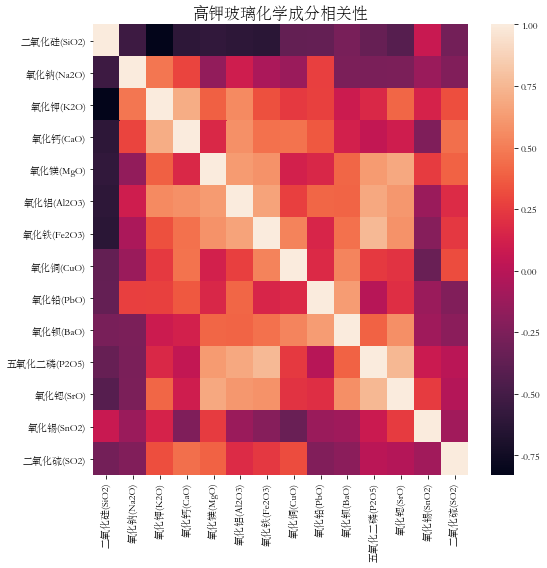

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns 
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
df = Gao_data
shifted_cols = df.columns
corrmat = df[shifted_cols].corr()

heatmap = sns.heatmap(corrmat)
ax.set_title('高钾玻璃化学成分相关性', fontsize=16)
plt.tight_layout()
plt.savefig('img4/高钾玻璃化学成分相关性.png',dpi=300, bbox_inches = 'tight')
plt.show()


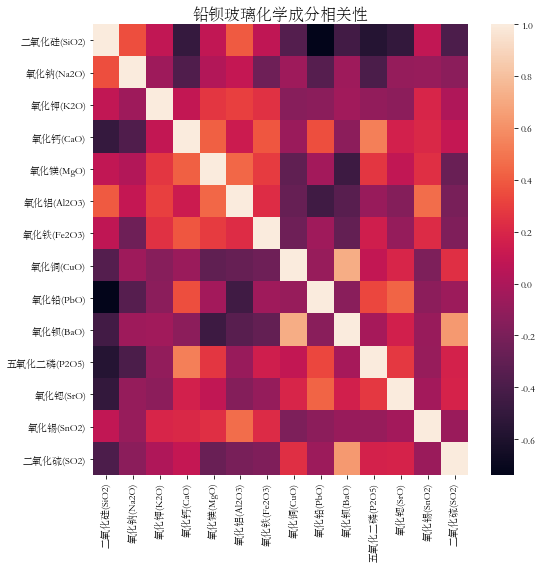

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns 
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
df = Qian_data
shifted_cols = df.columns
corrmat = df[shifted_cols].corr()

heatmap = sns.heatmap(corrmat)
ax.set_title('铅钡玻璃化学成分相关性', fontsize=16)
plt.tight_layout()
plt.savefig('img4/铅钡玻璃化学成分相关性.png',dpi=300, bbox_inches = 'tight')
plt.show()

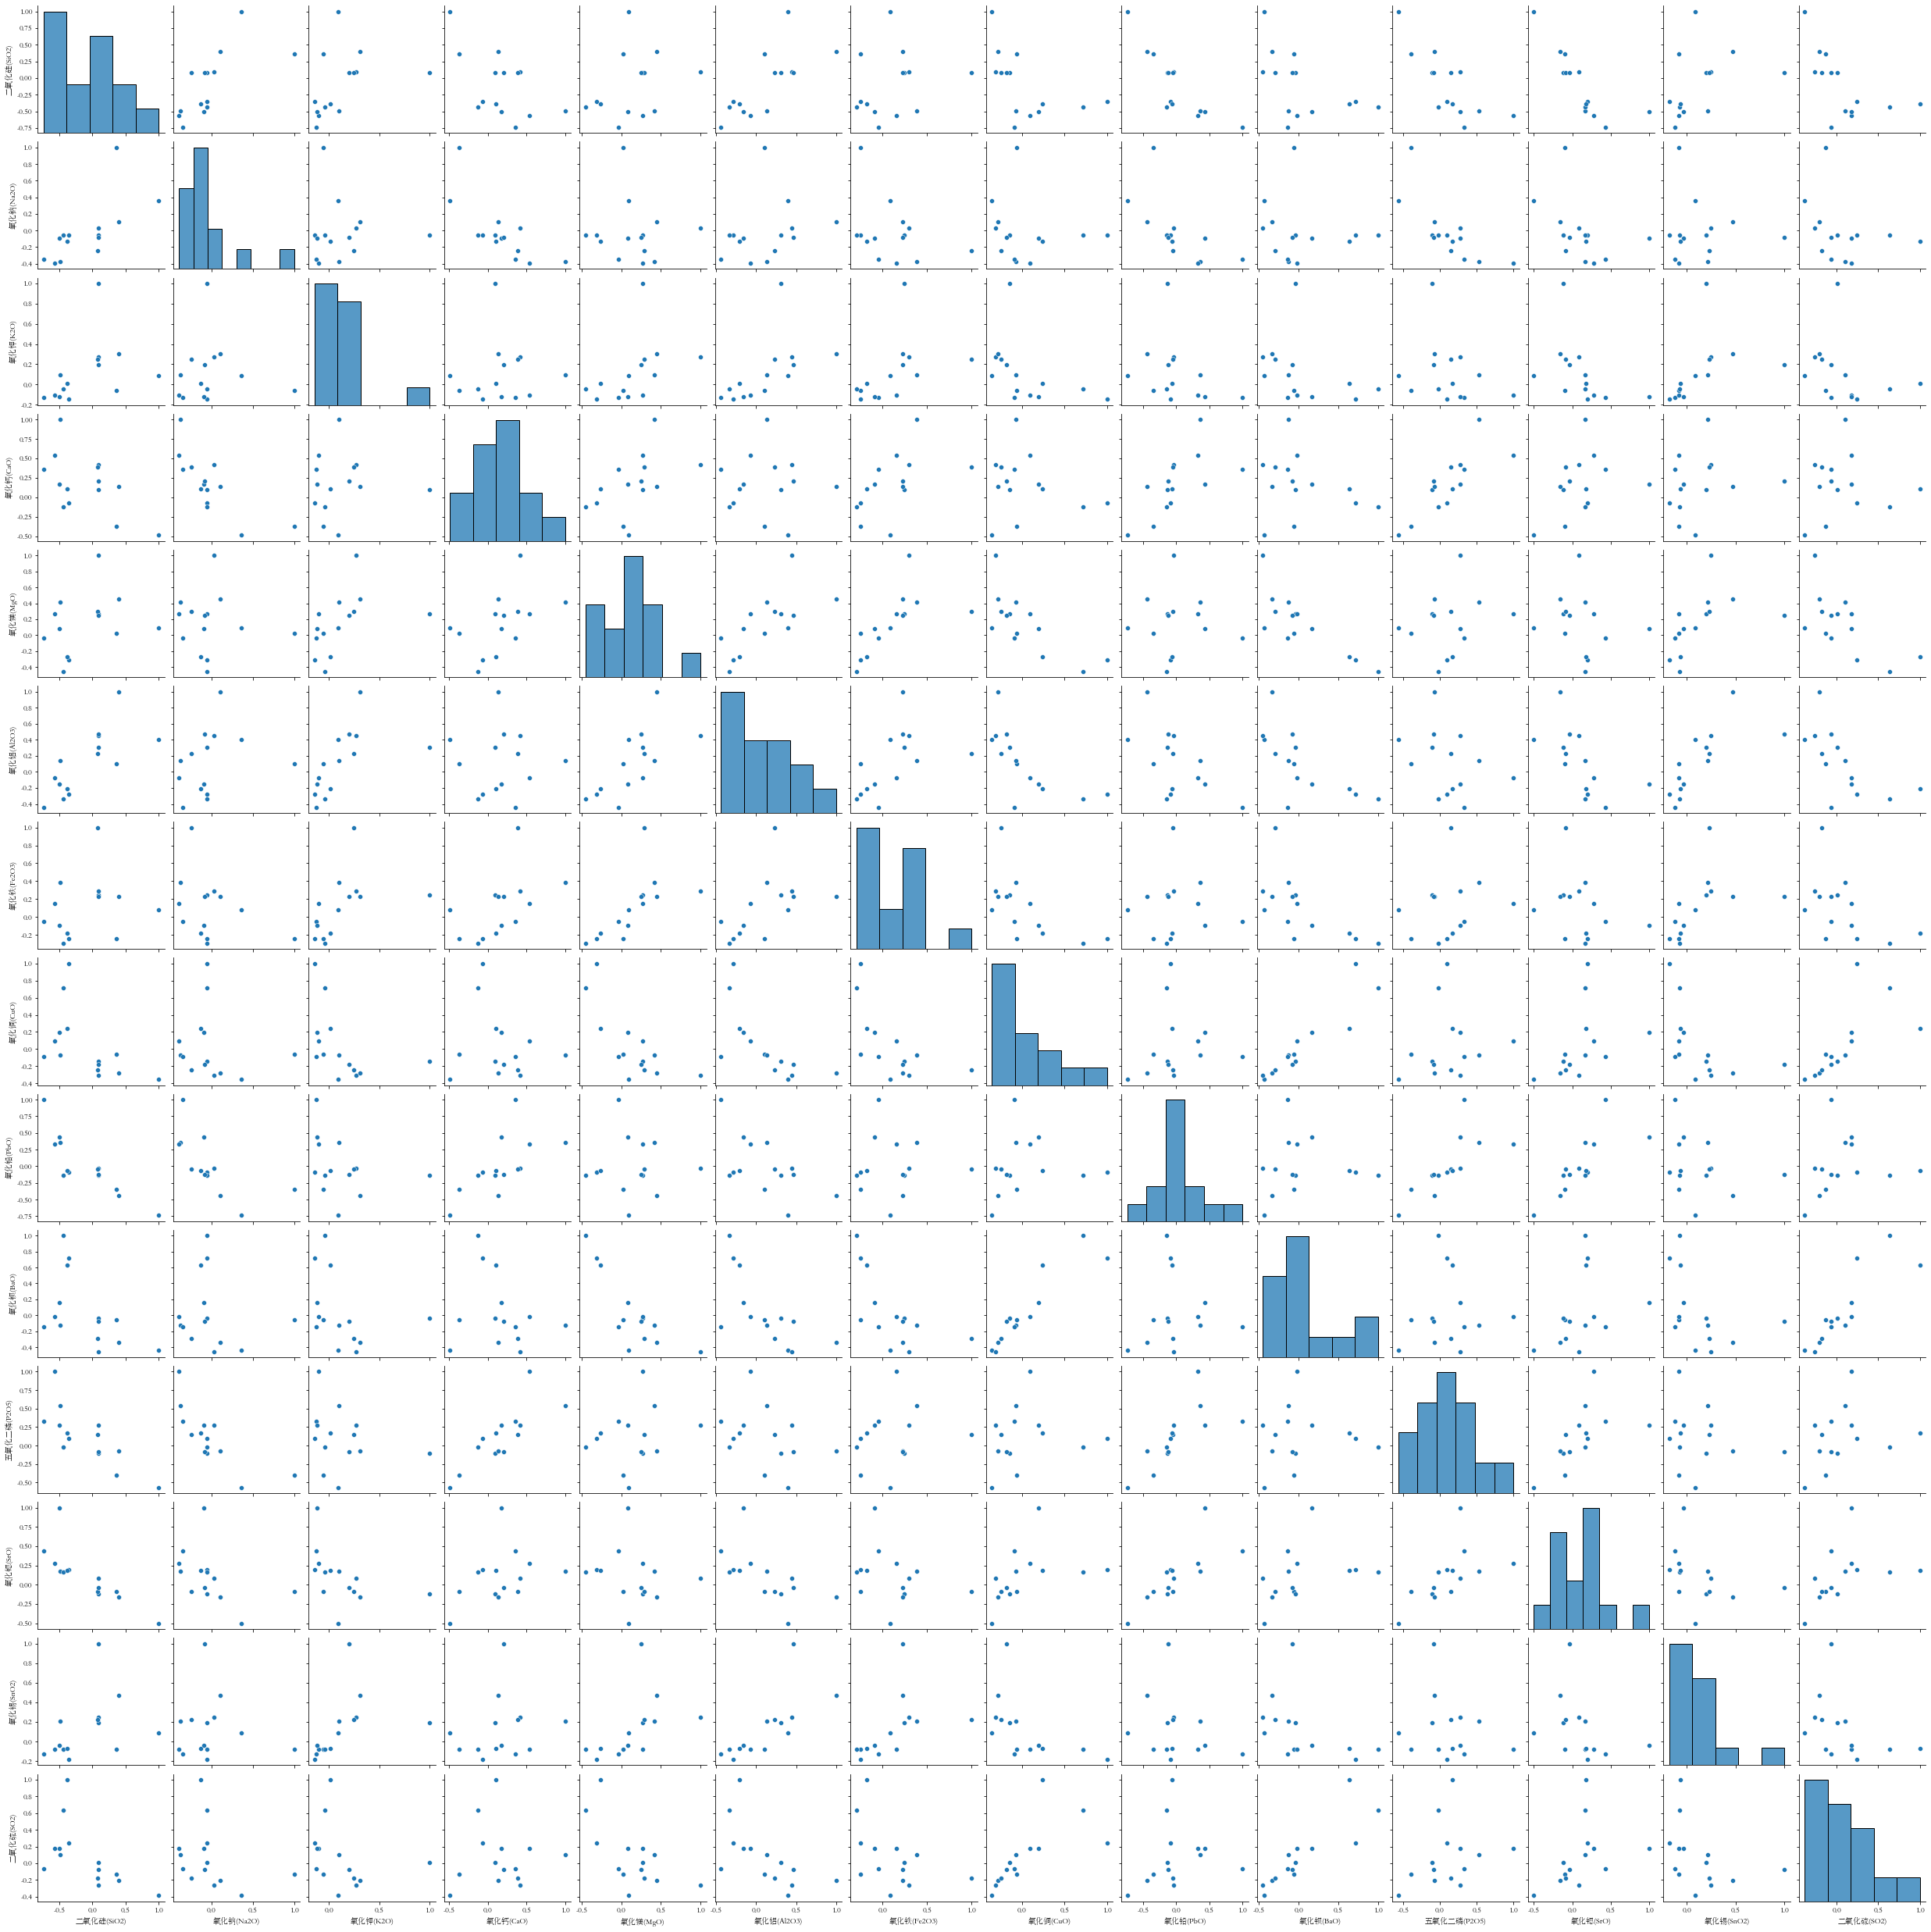

In [9]:
df = Qian_data
shifted_cols = df.columns
corrmat = df[shifted_cols].corr()
sns.pairplot(corrmat) 

In [ ]:
df = Gao_data
shifted_cols = df.columns
corrmat = df[shifted_cols].corr()
sns.pairplot(corrmat) 